Matthew Hall Module 7 Final Project
1. Introduction
In this project I selected 5 indepenedent variables to be used in creating a confident home price prediction model using linear regression and a small data set (provided). As you follow along you can see how we set a training set, fit the set, determine X and Y variables, shape, examine and finally plot our progress. 

2. Importing data as below. 
Using matplotlib, numpy, pandas, sklearn. We used a sample house price data set and are recognizing 20 instances from that set to use as training data. Resetting train attributes is as simple as rerunning train varibale with alterations.

As far as any data transformations, we kept the data congruent as to what we imported. This could of course have different effects on the end result if we were coming across dupliate records, or a large amount of nulls. 

Linear equation formula we used is Y = X1 β 1 + X2 β 2 + X3 β 3 +X4 β 4 + X5 β 5

In [43]:
import pandas as pd
import numpy as np
#insert link on line below for data sample
data = pd.read_csv('/Users/Mateus/Desktop/houseSmallData.csv')
data.shape
# this is picking row 0-20 to limit training data, hence the var train
train = data.iloc[0:20:,:]
train.shape
#train.head()

(20, 82)

(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

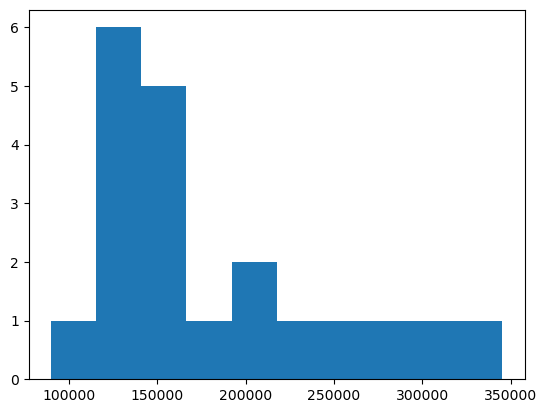

In [44]:
import matplotlib.pyplot as plt
train['SalePrice']
plt.hist(train['SalePrice'])
#data below shows the histogram of how the sample lays out in relation to price

In [45]:
numeric = train.select_dtypes(include=[np.number])
numeric.shape
#reafirming our number of samples is key along the way to ensure accuracy

(20, 40)

In [46]:
# Here we determine our numerical values for creating coorelations along the way. No futher data shaping was needed at this point. 
# Relatively clean data
corr = numeric.corr()
##corr.shape
#cols = corr['SalePrice'].sort_values(ascending=False)[0:6]
cols = corr['SalePrice'].sort_values(ascending=False)[0:6].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt'],
      dtype='object')

Here we can sum the nulls for choosing (reafirming) what attributes we can use

In [47]:
# Pickin out x and y, Y= Sales Price
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt
0,7,196.0,2,8,2003
1,6,0.0,2,6,1976
2,7,162.0,2,6,2001
3,7,0.0,1,7,1915
4,8,350.0,2,9,2000
5,5,0.0,1,5,1993
6,8,186.0,2,7,2004
7,7,240.0,2,7,1973
8,7,0.0,2,8,1931
9,5,0.0,1,5,1939


In [48]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
nulls


,0
Alley,20
PoolQC,20
MiscFeature,16
Fence,16
FireplaceQu,8
...,...
MasVnrType,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


Here is an example of using train data to show scatter correlation if we wanted to compare at this point

In [ ]:
#plt.scatter(train['FullBath'], y=target)

In [49]:
#all setup to build Linder Regression Model from here
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
predictions = model.predict(X)

In [50]:
# How good is the model
model.score (X,Y)

0.9085082112884374

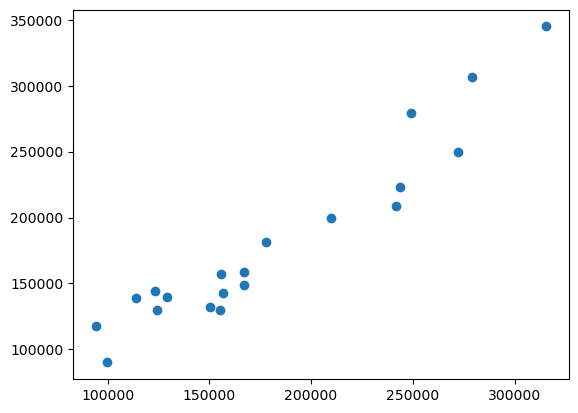

In [51]:
#Scatter plot!
plt.scatter(predictions, Y)

Now lets test against data we have not seen yet. 

In [ ]:
test = pd.read_csv('/Users/Mateus/Desktop/houseSmallData.csv')

In [ ]:
test.shape

In [ ]:
x = test[cols]
y = x['SalesPrice']
x = x.drop(['SalePrice'], axis = 1)
x

In [ ]:
predictions = model.predict(x)
print (f"R^2 is: {model.score(x,y)}")

Running test data from  jtest document is very close to train

In Conclusion, we are able to confirm the sample data set had a very strong correlation when determining the sales price based off of this 5 highest correlated attributes in our data set. Learning how to model a linear with scalable independent variables has proven to be a fantastic approach to creating a simple and effective prediction model. 